<a href="https://colab.research.google.com/github/abdulbari80/Machine-Learning-Projects/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving nykaa_dataset.csv to nykaa_dataset.csv


In [21]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline

In [7]:
df = pd.read_csv(io.BytesIO(uploaded['nykaa_dataset.csv']))

In [8]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,1/23/2021 15:17,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,9/7/2020 15:30,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,11/13/2020 12:24,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,6/14/2020 11:56,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,12/22/2020 15:24,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,https://www.nykaa.com/olay-ultra-lightweight-m...


In [9]:
df.shape

(61284, 17)

In [11]:
df.isna().sum()

,0
product_id,0
brand_name,0
review_id,0
review_title,0
review_text,9
author,0
review_date,0
review_rating,1
is_a_buyer,0
pro_user,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [43]:
def remove_special_chars(text):
  """ Remove non-alphanumeric characters from the dataset."""
  return re.sub(r'[^A-Za-z0-9\s]', '', str(text))

In [44]:
# Data cleaning
df['review_text'] = df['review_text'].apply(remove_special_chars)
df['review_text'] = df['review_text'].fillna(df['review_title'])

In [18]:
# Instantiate DistilBERT pre-trained model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [41]:
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [42]:
# Extract sentiment label with score
sentiment_label = []
confidence_score = []
for index, row in df.iterrows():
  results  = sentiment_analysis(row['review_text'])
  sentiment_label.append(results[0]['label'])
  confidence_score.append(results[0]['score'])

In [26]:
# Add sentiment label with score in the dataframe
df['sentiment_label'] = sentiment_label
df['confidence_score'] = confidence_score

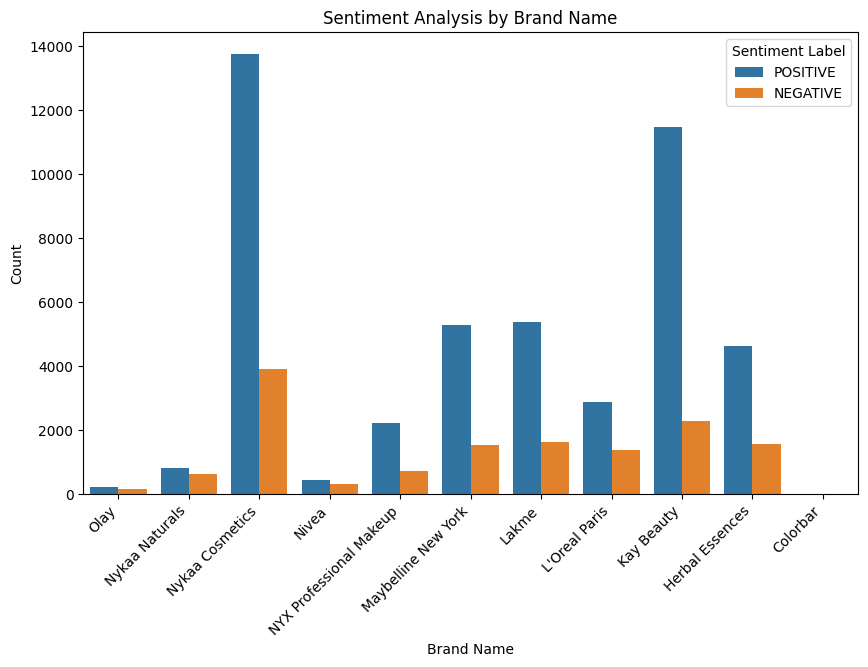

In [31]:
# Visualize senitment label by brand
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='brand_name', hue='sentiment_label')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Sentiment Analysis by Brand Name')
plt.legend(title='Sentiment Label')
plt.show()

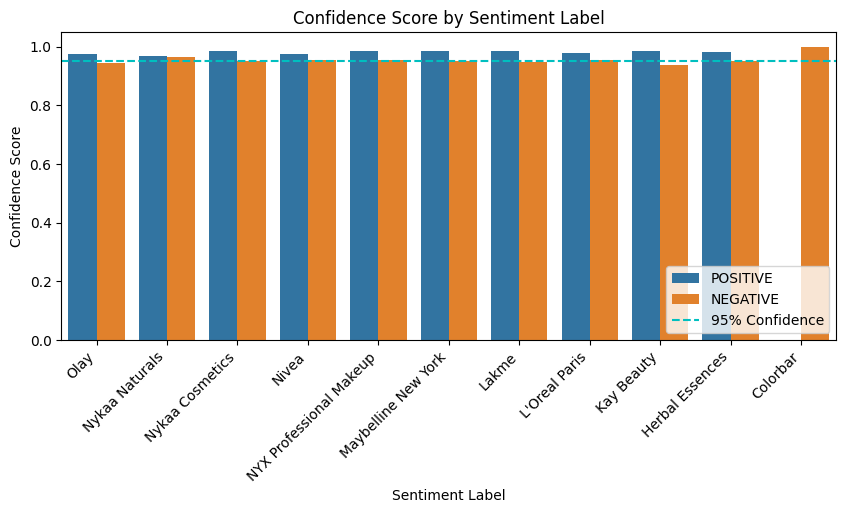

In [46]:
# Visualize confidence score by brands and their sentiment labels
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='brand_name', hue='sentiment_label', y='confidence_score', errorbar=None)
plt.axhline(y=0.95, color='c', linestyle='--', label='95% Confidence')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Sentiment Label')
plt.ylabel('Confidence Score')
plt.title('Confidence Score by Sentiment Label')
plt.show()